## 1. Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn import metrics

## 2. Импорт данных

In [2]:
df = pd.read_csv("dsall.csv")
df = df.rename(columns={'Unnamed: 0': 'ds'})
df['ds'] = pd.DatetimeIndex(df['ds'])

In [3]:
data = df[['ds', 'кофе американо']].copy()
data = data.rename(columns={'кофе американо': 'y'})

In [4]:
stable = data[45:152]
unstab = data[190:297]

In [5]:
train_un = unstab[0:91]
test_un = unstab[91:106]

train_st = stable[0:91]
test_st = stable[91:106]

## 3. Прогнозированние на стабильном участке + праздники

In [6]:
#Prophet 2
m = Prophet(weekly_seasonality = True, seasonality_mode='multiplicative',changepoint_prior_scale=0.5, seasonality_prior_scale= 1, changepoint_range = 0.95)
m.add_country_holidays(country_name='RU')
model = m.fit(train_st)

23:56:18 - cmdstanpy - INFO - Chain [1] start processing
23:56:19 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_dates = m.make_future_dataframe(periods=16, freq='d')
forecast = m.predict(future_dates)

In [9]:
df_merge = pd.merge(test_st, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]

y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
rmse = metrics.mean_squared_error(y_true, y_pred, squared=False)


In [10]:
time_wape = []
sum1 = 0
sum2 = 0

for i in range(len(df_merge)):
    sum1 += df_merge.y[i] - df_merge.yhat[i]
    sum2 += df_merge.y[i]
    time_wape.append(sum1/sum2)

wape = time_wape[-1]

### Точность прогнозирования

In [11]:
mape, wape

(0.10106343493637192, 0.08835570922756443)

### График

In [16]:
frcst = forecast[90:107]
frcst = frcst[['ds','yhat']]

df_merge = pd.merge(stable, forecast[['ds','yhat']],on='ds')
df_merge = df_merge[['ds','yhat','y']]

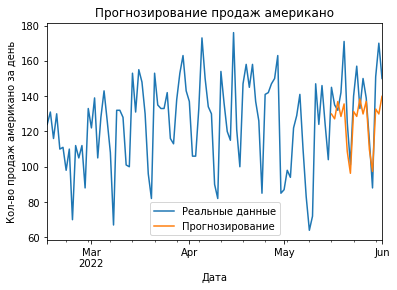

In [13]:
ax = plt.gca()

df_merge.plot(x='ds', y='y', kind='line', ax=ax, label = "Реальные данные")
frcst.plot(x='ds', y='yhat', kind='line', ax=ax, label = "Прогнозирование")
plt.title('Прогнозирование продаж американо')

ax.set_ylabel('Кол-во продаж американо за день')
ax.set_xlabel('Дата')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## 4. Прогнозированние на нестабильном участке + праздниики

In [17]:
#Prophet 2
m = Prophet(weekly_seasonality = True, seasonality_mode='multiplicative',changepoint_prior_scale=0.5, seasonality_prior_scale= 1, changepoint_range = 0.95)
m.add_country_holidays(country_name='RU')
model = m.fit(train_un)

future_dates = m.make_future_dataframe(periods=16, freq='d')
forecast = m.predict(future_dates)

00:00:24 - cmdstanpy - INFO - Chain [1] start processing
00:00:24 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
df_merge = pd.merge(test_un, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]

y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae = metrics.mean_absolute_error(y_true, y_pred)
mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
rmse = metrics.mean_squared_error(y_true, y_pred, squared=False)

In [19]:
time_wape = []
sum1 = 0
sum2 = 0

for i in range(len(df_merge)):
    sum1 += df_merge.y[i] - df_merge.yhat[i]
    sum2 += df_merge.y[i]
    time_wape.append(sum1/sum2)
    
wape = time_wape[-1]

### Точность прогнозирования

In [20]:
mape, wape

(0.2394556684489938, 0.08405596419206118)

### График

In [21]:
frcst2 = forecast[90:107]
frcst2 = frcst2[['ds','yhat']]

df_merge = pd.merge(unstab, forecast[['ds','yhat']],on='ds')
df_merge = df_merge[['ds','yhat','y']]

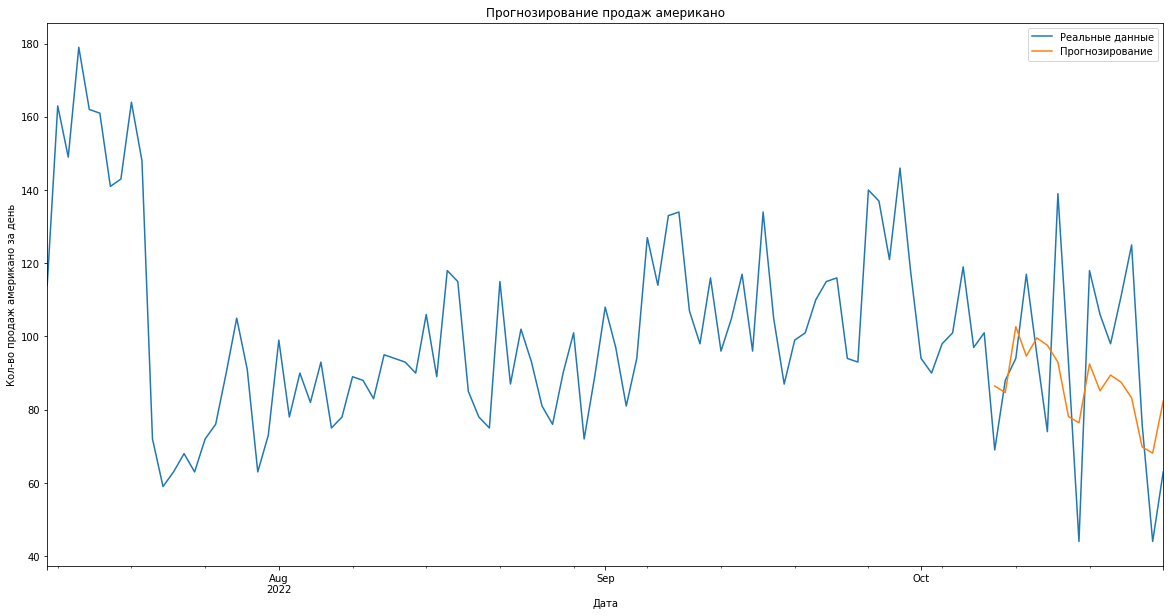

In [22]:
ax = plt.gca()

df_merge.plot(x='ds', y='y', kind='line', ax=ax, label = "Реальные данные")
frcst2.plot(x='ds', y='yhat', kind='line', ax=ax, label = "Прогнозирование")
plt.title('Прогнозирование продаж американо')

ax.set_ylabel('Кол-во продаж американо за день')
ax.set_xlabel('Дата')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()